In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
img = Image.open('selfie.jpg').convert('L')

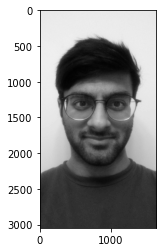

In [3]:
plt.imshow(img, cmap='gray')

In [4]:
pic = np.array(img)

In [5]:
pic

array([[226, 226, 226, ..., 225, 225, 226],
       [226, 226, 226, ..., 225, 226, 226],
       [226, 226, 226, ..., 226, 226, 226],
       ...,
       [ 52,  54,  56, ...,  48,  47,  47],
       [ 51,  54,  55, ...,  49,  49,  49],
       [ 50,  53,  54, ...,  49,  49,  50]], dtype=uint8)

In [6]:
pic.shape

(3046, 1632)

In [7]:
u,s,v = np.linalg.svd(pic)

In [8]:
u.shape[1]

3046

In [9]:
sigma = np.zeros((u.shape[1], v.shape[0]))
for i in range(min(u.shape[1], v.shape[0])):
    sigma[i, i] = s[i]

In [10]:
s.shape

(1632,)

In [11]:
sigma.shape

(3046, 1632)

In [12]:
v.shape

(1632, 1632)

In [13]:
u[:, 0:2].shape

(3046, 2)

In [14]:
v[0:2, :].shape

(2, 1632)

In [40]:
orig_size = (u.shape[0]*u.shape[1])+(sigma.shape[0]*sigma.shape[1]) + (v.shape[0] * v.shape[1])
print(orig_size)

16912612


In [35]:
def compress(u, s, v, rank):
    new_sigma = np.zeros((u[:, 0:rank].shape[1], v[0:rank, :].shape[0]))
    for i in range(min(u[:, 0:rank].shape[1], v[0:rank, :].shape[0])):
        new_sigma[i, i] = s[i]
    new_img = np.dot(u[:, 0:rank], np.dot(new_sigma, v[0:rank, :]))
    size = (u[:, 0:rank].shape[0]*u[:, 0:rank].shape[1])+(new_sigma.shape[0]*new_sigma.shape[1]) + (v[0:rank, :].shape[0] * v[0:rank, :].shape[1])
    return size, new_img

In [36]:
sz, new_pic = compress(u, s, v, 10)

In [37]:
sz

46880

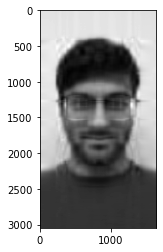

In [38]:
plt.imshow(new_pic, cmap='gray')

In [41]:
ranks = [1, 5, 10, 20, 40, 80, 100, 200, 400, 800, 1600, 2000]